In [5]:
%pip install -r requirements.txt
import os
import pickle
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import defaultdict

In [6]:
os.chdir("C:/Users/gabeyie/OneDrive - University of Tennessee/Documents/IJF_Paper")
print("Current Working Directory:", os.getcwd())
appendix_folder = "appendix results"
if not os.path.exists(appendix_folder):
    os.makedirs(appendix_folder)

Current Working Directory: C:\Users\gabeyie\OneDrive - University of Tennessee\Documents\IJF_Paper


In [7]:
plt.rcParams.update({
    'font.size': 20,
    'axes.titlesize': 20,
    'axes.labelsize': 20,
    'xtick.labelsize': 15,
    'ytick.labelsize': 20,
})

In [8]:
# This code loads the predictions for all six models
with open("Forecasts/Sahm_Rule_Article_predictions_dict.pkl", "rb") as f:
    Sahm_Rule_Article_predictions = pickle.load(f)

with open("Forecasts/Sahm_Rule_Headline_predictions_dict.pkl", "rb") as f:
    Sahm_Rule_Headline_predictions = pickle.load(f)

with open("Forecasts/Continuous_Article_predictions_dict.pkl", "rb") as f:
    Continuous_Article_predictions = pickle.load(f)

with open("Forecasts/Continuous_Headline_predictions_dict.pkl", "rb") as f:
    Continuous_Headline_predictions = pickle.load(f)

with open("Forecasts/Alt_Updating_Scheme_Article_predictions_dict.pkl", "rb") as f:
    Alt_Updating_Scheme_Article_predictions = pickle.load(f)

with open("Forecasts/Alt_Updating_Scheme_Headline_predictions_dict.pkl", "rb") as f:
    Alt_Updating_Scheme_Headline_predictions = pickle.load(f)

# This code loads the variables selected from the Elastic nets and PCA for all four models
with open("Forecasts/Sahm_Rule_Variables.pkl", "rb") as f:
    variables = pickle.load(f)
    Sahm_Rule_Article_elasticnet_feature_counts = variables["Sahm_Rule_Article_elasticnet_feature_counts"]
    Sahm_Rule_Headline_elasticnet_feature_counts = variables["Sahm_Rule_Headline_elasticnet_feature_counts"]
    Sahm_Rule_Article_pca_components_counts = variables["Sahm_Rule_Article_pca_components_counts"]
    Sahm_Rule_Headline_pca_components_counts = variables["Sahm_Rule_Headline_pca_components_counts"]
    Sahm_Rule_Article_column_names_dict = variables["Sahm_Rule_Article_column_names_dict"]
    Sahm_Rule_Headline_column_names_dict = variables["Sahm_Rule_Headline_column_names_dict"]
    Sahm_Rule_Article_top_features_per_model= variables["Sahm_Rule_Article_top_features_per_model"]
    Sahm_Rule_Headline_top_features_per_model = variables["Sahm_Rule_Headline_top_features_per_model"]

with open("Forecasts/Continuous_Variables.pkl", "rb") as f:
    variables = pickle.load(f)
    Continuous_Article_elasticnet_feature_counts = variables["Continuous_Article_elasticnet_feature_counts"]
    Continuous_Headline_elasticnet_feature_counts = variables["Continuous_Headline_elasticnet_feature_counts"]
    Continuous_Article_pca_components_counts = variables["Continuous_Article_pca_components_counts"]
    Continuous_Headline_pca_components_counts = variables["Continuous_Headline_pca_components_counts"]
    Continuous_Article_column_names_dict = variables["Continuous_Article_column_names_dict"]
    Continuous_Headline_column_names_dict = variables["Continuous_Headline_column_names_dict"]
    Continuous_Article_top_features_per_model= variables["Continuous_Article_top_features_per_model"]
    Continuous_Headline_top_features_per_model = variables["Continuous_Headline_top_features_per_model"]

with open("Forecasts/Alt_Updating_Scheme_Variables.pkl", "rb") as f:
    variables = pickle.load(f)
    Alt_Updating_Scheme_Article_elasticnet_feature_counts = variables["Alt_Updating_Scheme_Article_elasticnet_feature_counts"]
    Alt_Updating_Scheme_Headline_elasticnet_feature_counts = variables["Alt_Updating_Scheme_Headline_elasticnet_feature_counts"]
    Alt_Updating_Scheme_Article_pca_components_counts = variables["Alt_Updating_Scheme_Article_pca_components_counts"]
    Alt_Updating_Scheme_Headline_pca_components_counts = variables["Alt_Updating_Scheme_Headline_pca_components_counts"]
    Alt_Updating_Scheme_Article_column_names_dict = variables["Alt_Updating_Scheme_Article_column_names_dict"]
    Alt_Updating_Scheme_Headline_column_names_dict = variables["Alt_Updating_Scheme_Headline_column_names_dict"]
    Alt_Updating_Scheme_Article_top_features_per_model= variables["Alt_Updating_Scheme_Article_top_features_per_model"]
    Alt_Updating_Scheme_Headline_top_features_per_model = variables["Alt_Updating_Scheme_Headline_top_features_per_model"]

# This code loads the predictions that uses the FREDMD datatset for all four models
with open("Forecasts/Sahm_Rule_FredMD_predictions_dict.pkl", "rb") as f:
    Sahm_Rule_FredMD_predictions = pickle.load(f)

with open("Forecasts/Sahm_Rule_FREDMD_plus_Text_predictions_dict.pkl", "rb") as f:
    Sahm_Rule_FREDMD_plus_Text_predictions = pickle.load(f)

with open("Forecasts/Continuous_FredMD_predictions_dict.pkl", "rb") as f:
    Continuous_FredMD_predictions = pickle.load(f)

with open("Forecasts/Continuous_FREDMD_plus_Text_predictions_dict.pkl", "rb") as f:
    Continuous_FREDMD_plus_Text_predictions = pickle.load(f)

# This code loads the predictions for the two benchmark models (Actual benchmark model and alternative benchmark model for robustness checks)
with open("Forecasts/predictions_dict_bm1.pkl", "rb") as f:
    Benchmark_model_1 = pickle.load(f)

with open("Forecasts/predictions_dict_bm2.pkl", "rb") as f:
    Benchmark_model_2 = pickle.load(f)

# This code loads the true target variable values for each forecast horizon
with open("Forecasts/y_true_dict.pkl", "rb") as f:
    True_values = pickle.load(f)

# This code loads the necessary variables like, number of forecast horizons, out-of-sample dates, updating rule, and oos recessionary periods according to NBER
with open("Forecasts/other_variables.pkl", "rb") as f:
    variables = pickle.load(f)
    test_dates = variables["test_dates"]
    horizons = variables["horizons"]
    update = variables["update_indicator"]
    recessions = variables["recessions"]

with open("Forecasts/Alt_Updating_Scheme_other_variables.pkl", "rb") as f:
    variables = pickle.load(f)
    alt_update = variables["update_indicator"]

Quant_Features = pd.read_excel('Data/EMV_Data.xlsx')
df = pd.read_csv('Data/current.csv', header=0)

In [9]:
transformation_codes = df.iloc[0]
df = df.drop(df.index[0])  # Remove the transformation codes row
df = df.dropna(axis=1)  # Remove columns with "nan"

# Adjusting transformation_codes to reflect columns actually present after NaN removal
transformation_codes = transformation_codes[df.columns]

# Define transformation functions again
def transform_series(series, code):
    if code == 1:
        # No transformation
        return series
    elif code == 2:
        # First differences 
        return series.diff(1)
    elif code == 3:
        # Second differences
        return series.diff(2)
    elif code == 4:
        # Log transformation
        return np.log(series)
    elif code == 5:
        # Log differences
        return np.log(series).diff(1)
    elif code == 6:
        # Log second differences
        return np.log(series).diff(2)
    elif code == 7:
        # Percent change differences
        return series.pct_change()
    else:
        # Default case, should not be reached
        return series

# Apply transformations, skipping the 'sasdate' column for transformations
for column in df.columns[1:]:  # Exclude date column from transformations
    code = int(transformation_codes[column])  # Convert code to integer for processing
    df[column] = transform_series(df[column].astype(float), code)

# Create lags for all variables except the 'sasdate' column
df_lagged = df.copy()

# Convert 'sasdate' to datetime format to enable filtering
df_lagged['sasdate'] = pd.to_datetime(df_lagged['sasdate'], format='%m/%d/%Y')

# Create the sub-dataframe for the specified date range
start_date = '1986-01-01'
end_date = '2020-12-31'
FredMD = df_lagged[(df_lagged['sasdate'] >= start_date) & (df_lagged['sasdate'] <= end_date)]

# Set 'sasdate' as the index of the dataframe
FredMD.set_index('sasdate', inplace=True)

summary = FredMD.describe()
# Transpose the summary
transposed_summary = summary.transpose()
file_path = os.path.join(appendix_folder, "Appendix_Table2.csv")
transposed_summary.to_csv(file_path)

In [10]:
Quant_Features['Date'] = pd.to_datetime(Quant_Features['Year'].astype(str) + '/' + Quant_Features['Month'].astype(str) + '/01')
Quant_Features.set_index('Date', inplace=True)
selected_df = Quant_Features.loc['1986-02-01':'2020-12-01']
summary = selected_df.describe()
transposed_summary = summary.transpose()
file_path = os.path.join(appendix_folder, "Appendix_Table3.csv")
transposed_summary.to_csv(file_path)

Plot saved as 'appendix results/Appendix_Figure2.pdf'


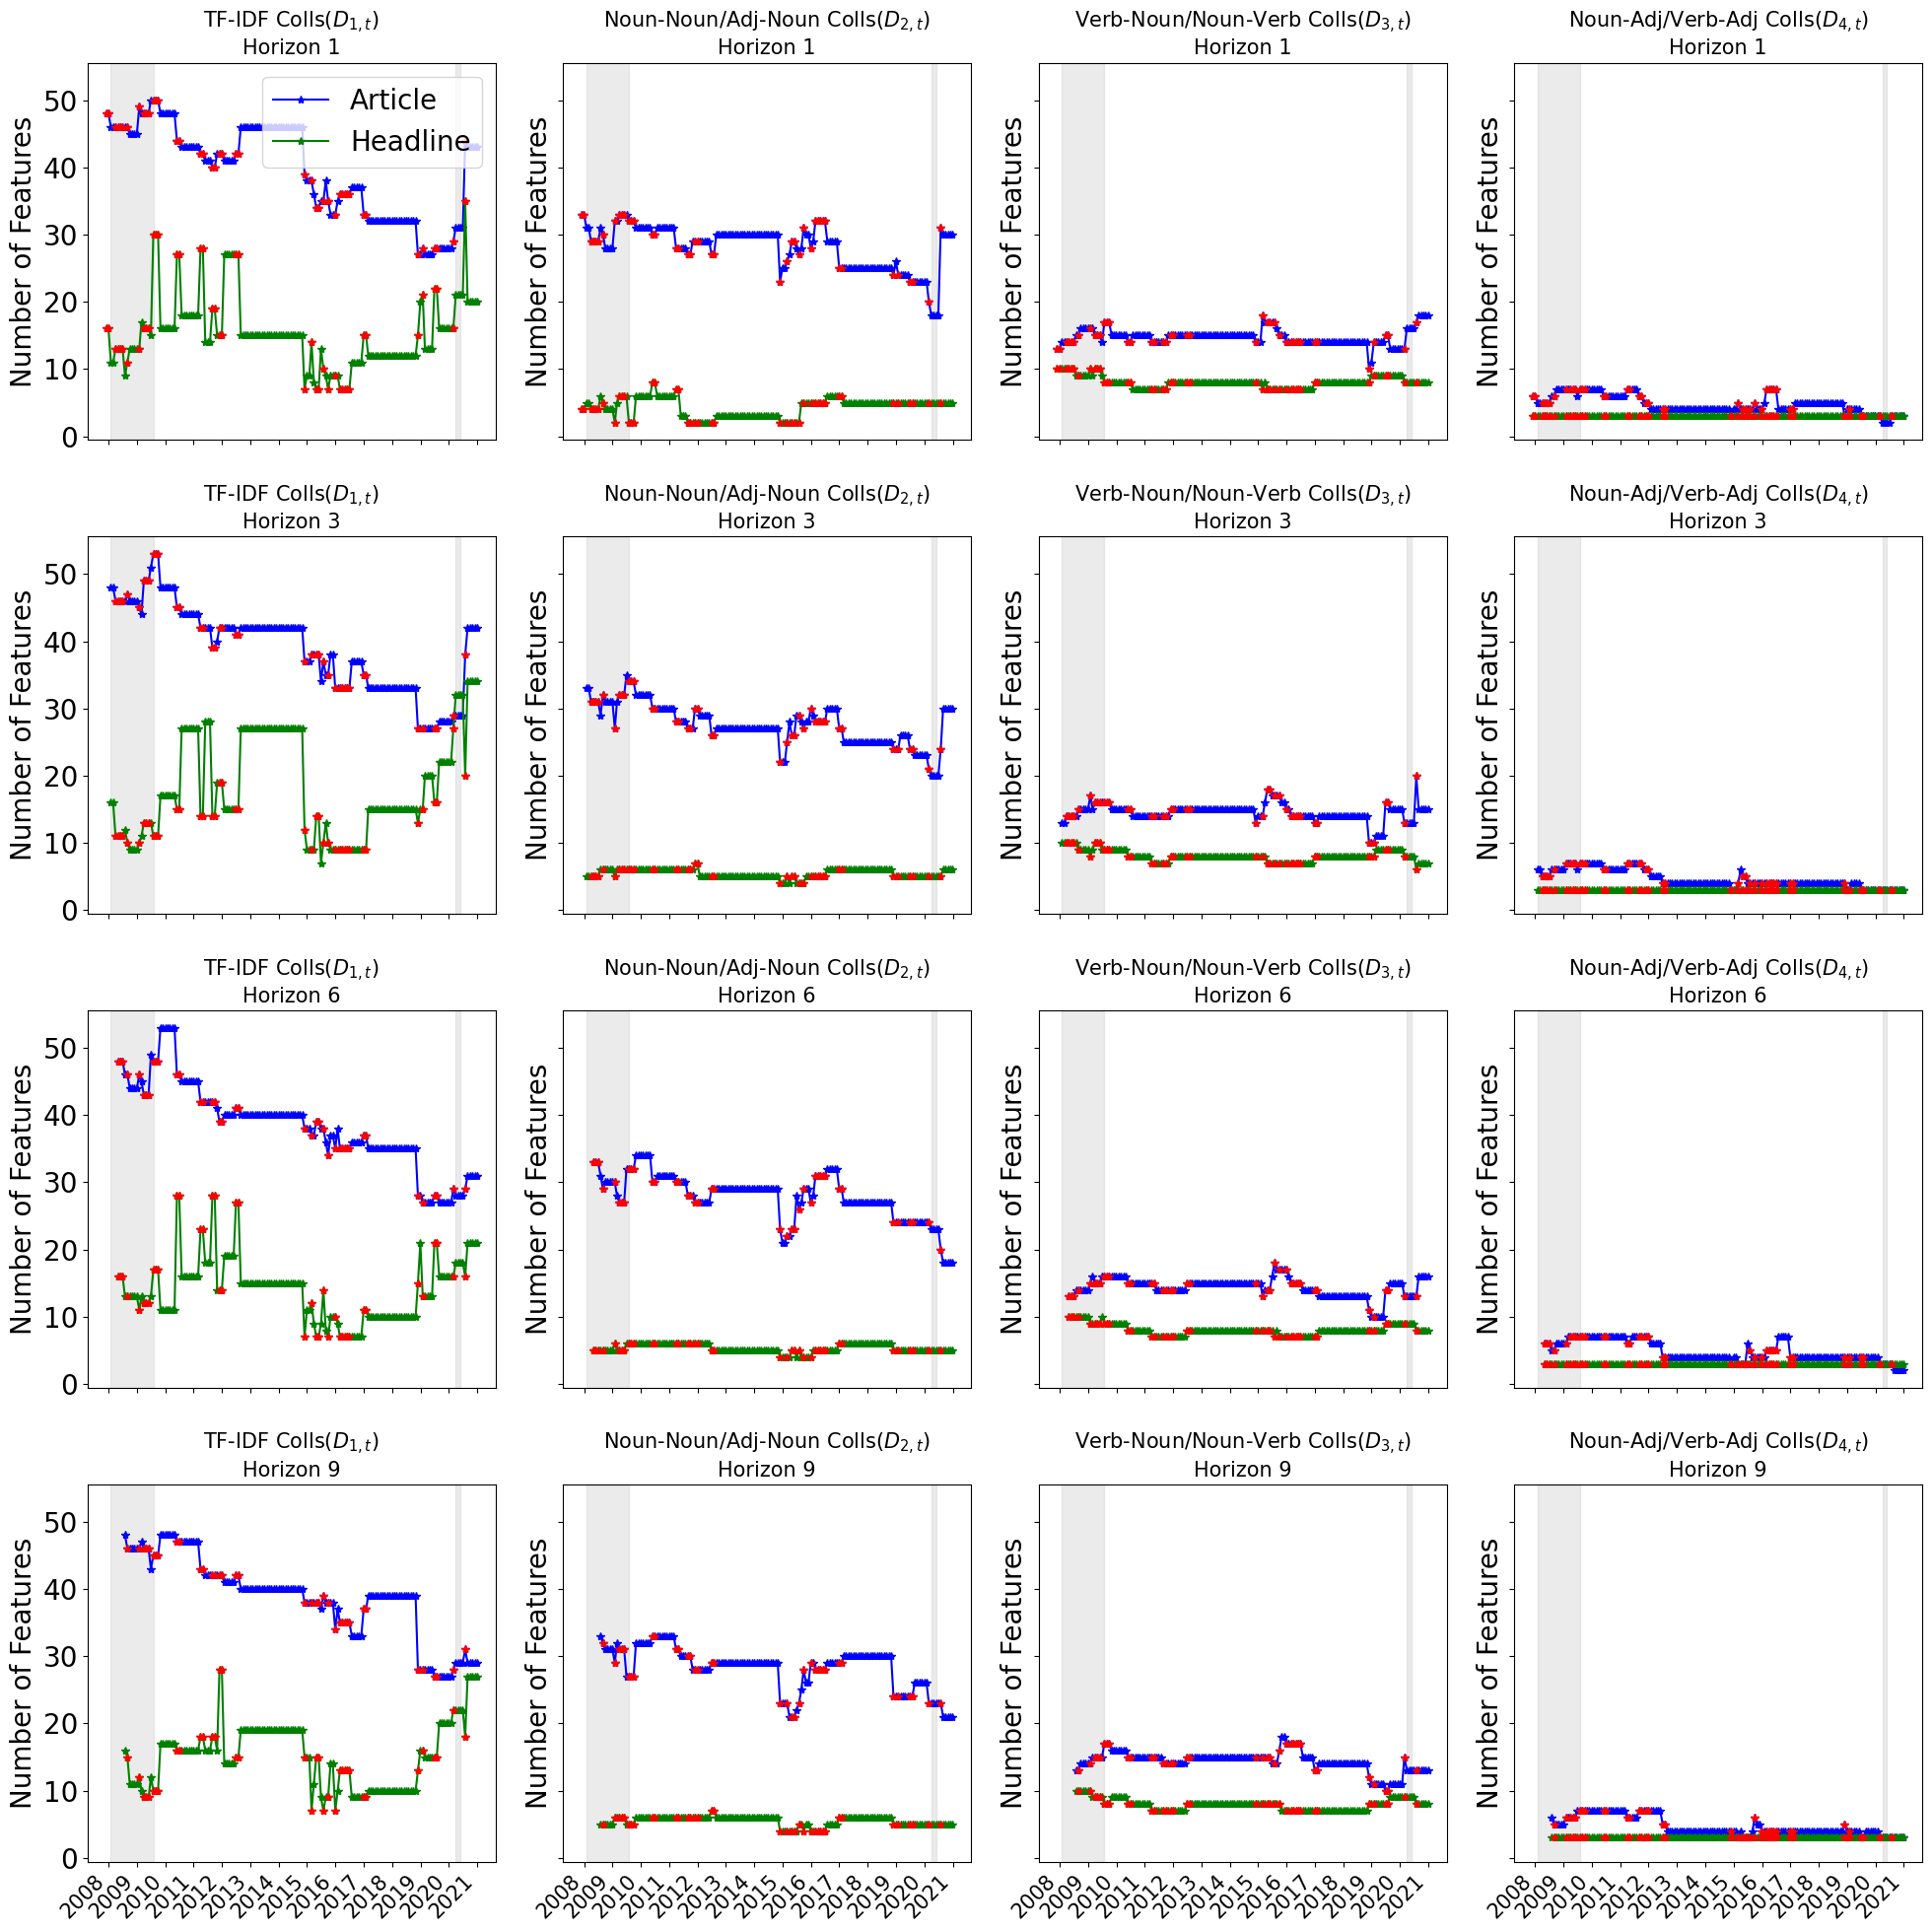

In [11]:
dates = test_dates
n_models_articles = len(Alt_Updating_Scheme_Article_top_features_per_model.keys())
n_models_headlines = len(Alt_Updating_Scheme_Headline_top_features_per_model.keys())
n_horizons = len(horizons)

fig, axs = plt.subplots(n_horizons, n_models_articles, figsize=(5 * n_models_articles, 5 * n_horizons), sharex=True, sharey=True)

if n_horizons * n_models_articles == 1:
    axs = np.array([axs])

axs = axs.ravel()

for model_idx, (model_name, _) in enumerate(Alt_Updating_Scheme_Article_top_features_per_model.items()):
    for horizon_idx, horizon in enumerate(horizons):
        ax = axs[n_models_articles * horizon_idx + model_idx]
        
        # Fetch Article and Headline feature counts for the current model and horizon
        article_feature_counts = Alt_Updating_Scheme_Article_elasticnet_feature_counts[model_name][horizon]
        headline_feature_counts = Alt_Updating_Scheme_Headline_elasticnet_feature_counts[model_name][horizon]
        
        # Adjusted dates to match the feature count length
        adjusted_test_dates = test_dates[(horizon - 1):]
        adjusted_article_feature_counts = article_feature_counts[-len(adjusted_test_dates):]
        adjusted_headline_feature_counts = headline_feature_counts[-len(adjusted_test_dates):]
        adjusted_update_indicator = alt_update[(horizon - 1):].values[-len(adjusted_test_dates):]

        # Plot the feature counts for Articles in blue
        ax.plot(adjusted_test_dates, adjusted_article_feature_counts, marker='*', linestyle='-', color='blue', label='Article')
        
        # Plot the feature counts for Headlines in green
        ax.plot(adjusted_test_dates, adjusted_headline_feature_counts, marker='*', linestyle='-', color='green', label='Headline')

        # Plot red markers where updates occur for Articles
        for date, update_indicator in zip(adjusted_test_dates, adjusted_update_indicator):
            if update_indicator:  # if the indicator is True, mark the update point for Articles
                ax.plot(date, adjusted_article_feature_counts[adjusted_test_dates.tolist().index(date)], 'r*')
        
        # Plot red markers where updates occur for Headlines
        for date, update_indicator in zip(adjusted_test_dates, adjusted_update_indicator):
            if update_indicator:  # if the indicator is True, mark the update point for Headlines
                ax.plot(date, adjusted_headline_feature_counts[adjusted_test_dates.tolist().index(date)], 'r*')

        ax.set_title(f'{model_name}\nHorizon {horizon}', fontsize=15)
        
        # Optional: Set the x-axis to show dates instead of intervals
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

        # Fill the recession periods
        for start, end in zip(recessions.index[recessions.diff() == 1], recessions.index[recessions.diff() == -1]):
            if start in test_dates.values and end in test_dates.values:
                ax.axvspan(start, end, color='silver', alpha=0.3)

        # Rotate date labels for better readability
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
        
        ax.set_ylabel('Number of Features', fontsize=20)
        
        # Optional: Add legend only in the first subplot of each column
        if horizon_idx == 0 and model_idx == 0:
            ax.legend()

plt.subplots_adjust(bottom=0.2, top=0.9, left=0.1, right=0.9, hspace=0.4, wspace=0.4)
plt.tight_layout()
fig.savefig("appendix results/Appendix_Figure2.pdf", format="pdf", bbox_inches="tight", dpi=600)
print("Plot saved as 'appendix results/Appendix_Figure2.pdf'")

In [12]:
# Define functions for repeated calculations
def calculate_r2_oos(y_true, y_pred, y_benchmark):
    mspe_model = np.mean((y_true - y_pred)**2)
    mspe_benchmark = np.mean((y_true - y_benchmark)**2)
    return (1 - (mspe_model / mspe_benchmark)) * 100

def calculate_rrmsfe(y_true, y_pred, y_benchmark):
    msfe_model = np.mean((y_true - y_pred)**2)
    msfe_benchmark = np.mean((y_true - y_benchmark)**2)
    return np.sqrt(msfe_model / msfe_benchmark)

def perform_cw_test(y_true, y_pred, y_benchmark):
    error_diff = (y_true - y_benchmark)**2 - (y_true - y_pred)**2 + (y_pred - y_benchmark)**2
    return stats.ttest_1samp(error_diff, 0, alternative='greater')

# Initialize dictionaries using defaultdict
r2_oos_dict = defaultdict(lambda: defaultdict(float))
rrmsfe_dict = defaultdict(lambda: defaultdict(float))
cw_test_results_dict = defaultdict(lambda: defaultdict(tuple))

In [13]:
# Define a function to handle all calculations and store results in a DataFrame
def process_predictions(predictions, model_name_prefix, benchmark):
    # Create a dictionary to hold results
    results = defaultdict(list)

    for model_name in predictions.keys():
        # Initialize lists for each horizon's metrics
        r2_oos_values = []
        rrmsfe_values = []
        cw_stat_values = []
        p_value_values = []

        for h in horizons:
            # Extract data
            y_true = np.array(True_values[model_name][h])
            y_pred = np.array(predictions[model_name][h])
            y_benchmark = np.array(benchmark[model_name][h])  # Use the selected benchmark

            # Calculate R-squared out-of-sample
            r2_oos = calculate_r2_oos(y_true, y_pred, y_benchmark)
            r2_oos_values.append(f"{r2_oos:.2f}")  # 2 decimal places
            
            # Calculate RRMSFE
            rrmsfe = calculate_rrmsfe(y_true, y_pred, y_benchmark)
            rrmsfe_values.append(f"{rrmsfe:.3f}")  # 3 decimal places
            
            # Perform Clark-West test
            cw_stat, p_value = perform_cw_test(y_true, y_pred, y_benchmark)
            cw_stat_values.append(f"{cw_stat:.3f}")  # 3 decimal places
            
            # Format p-value with stars
            if p_value < 0.01:
                p_value_values.append(f"{p_value:.3f} ***")  # 3 stars
            elif p_value < 0.05:
                p_value_values.append(f"{p_value:.3f} **")  # 2 stars
            elif p_value < 0.1:
                p_value_values.append(f"{p_value:.3f} *")  # 1 star
            else:
                p_value_values.append(f"{p_value:.3f}")  # No stars

        # Add results for this model to the dictionary, using the horizon as part of the column name
        results['Model'].append(model_name)
        results['Source'].append(model_name_prefix)

        for i, h in enumerate(horizons):
            results[f'R2_OOS_Horizon{h}'].append(r2_oos_values[i])
            results[f'RRMSFE_Horizon{h}'].append(rrmsfe_values[i])
            results[f'CW_Horizon{h}'].append(cw_stat_values[i])
            results[f'P_Value_Horizon{h}'].append(p_value_values[i])

    # Convert the results dictionary into a pandas DataFrame
    df = pd.DataFrame(results)

    # Return the DataFrame for later use
    return df

# Specify the benchmark you want to use
selected_benchmark = Benchmark_model_1

# Initialize an empty list to store DataFrames
appendix_results = []

# Process all prediction sets and store the DataFrames
appendix_results.append(process_predictions(Alt_Updating_Scheme_Article_predictions, "Alternative Updating Scheme Article", selected_benchmark))

# Combine all DataFrames into one
appendix_results_df = pd.concat(appendix_results, ignore_index=True)

# Save the complete table to a CSV file
appendix_results_df.to_csv(os.path.join(appendix_folder, "Appendix_Table1.csv"), index=False)

In [14]:
dates = test_dates
selected_benchmark = Benchmark_model_1

# Define a function to process predictions for a specific period
def process_predictions_by_period(predictions, model_name_prefix, benchmark, period, period_name):
    # Create a dictionary to hold results
    results = defaultdict(list)

    for model_name in predictions.keys():
        # Initialize lists for each horizon's metrics
        r2_oos_values = []
        rrmsfe_values = []
        cw_stat_values = []
        p_value_values = []

        for h in horizons:
            # Extract data
            # Adjust dates based on the horizon
            adjusted_dates = dates[(h - 1):]

            # Create Series with adjusted dates
            y_true = pd.Series(True_values[model_name][h], index=adjusted_dates)
            y_pred = pd.Series(predictions[model_name][h], index=adjusted_dates)
            y_benchmark = pd.Series(benchmark[model_name][h], index=adjusted_dates)


            # Filter data by the specified period
            y_true_period = y_true[period]
            y_pred_period = y_pred[period]
            y_benchmark_period = y_benchmark[period]

            # Convert filtered data to numpy arrays
            y_true_period = y_true_period.to_numpy()
            y_pred_period = y_pred_period.to_numpy()
            y_benchmark_period = y_benchmark_period.to_numpy()

            # Calculate R-squared out-of-sample
            r2_oos = calculate_r2_oos(y_true_period, y_pred_period, y_benchmark_period)
            r2_oos_values.append(f"{r2_oos:.2f}")  # 2 decimal places

            # Calculate RRMSFE
            rrmsfe = calculate_rrmsfe(y_true_period, y_pred_period, y_benchmark_period)
            rrmsfe_values.append(f"{rrmsfe:.3f}")  # 3 decimal places

            # Perform Clark-West test
            cw_stat, p_value = perform_cw_test(y_true_period, y_pred_period, y_benchmark_period)
            cw_stat_values.append(f"{cw_stat:.3f}")  # 3 decimal places

            # Format p-value with stars
            if p_value < 0.01:
                p_value_values.append(f"{p_value:.3f} ***")  # 3 stars
            elif p_value < 0.05:
                p_value_values.append(f"{p_value:.3f} **")  # 2 stars
            elif p_value < 0.1:
                p_value_values.append(f"{p_value:.3f} *")  # 1 star
            else:
                p_value_values.append(f"{p_value:.3f}")  # No stars

        # Add results for this model to the dictionary, using the horizon as part of the column name
        results['Model'].append(model_name)
        results['Source'].append(f"{model_name_prefix} ({period_name})")

        for i, h in enumerate(horizons):
            results[f'R2_OOS_Horizon{h}'].append(r2_oos_values[i])
            results[f'RRMSFE_Horizon{h}'].append(rrmsfe_values[i])
            results[f'CW_Horizon{h}'].append(cw_stat_values[i])
            results[f'P_Value_Horizon{h}'].append(p_value_values[i])

    # Convert the results dictionary into a pandas DataFrame
    df = pd.DataFrame(results)

    # Return the DataFrame for later use
    return df


# Specify the periods
recession_period = recessions == 1  # Boolean mask for recessionary periods
expansion_period = recessions == 0  # Boolean mask for expansionary periods

# Initialize lists to store results
recession_results = []
expansion_results = []

# Process all prediction sets for both periods
for prediction_set, name_prefix in [
    (Sahm_Rule_Article_predictions, "Sahm Rule Article"),
    (Sahm_Rule_Headline_predictions, "Sahm Rule Headline"),
    (Continuous_Article_predictions, "Continuous Article"),
    (Continuous_Headline_predictions, "Continuous Headline"),
]:
    recession_results.append(process_predictions_by_period(prediction_set, name_prefix, selected_benchmark, recession_period, "Recession"))
    expansion_results.append(process_predictions_by_period(prediction_set, name_prefix, selected_benchmark, expansion_period, "Expansion"))

# Combine the results into DataFrames
recession_results_df = pd.concat(recession_results, ignore_index=True)
expansion_results_df = pd.concat(expansion_results, ignore_index=True)

# Save the results to CSV files
results_df = pd.concat([recession_results_df, expansion_results_df])
results_df.to_csv(os.path.join(appendix_folder, "Appendix_Table5.csv"), index=False)

In [15]:
def process_predictions_by_period(predictions, model_name_prefix, benchmark, period, period_name):
    results = defaultdict(list)

    for model_name in predictions.keys():
        # Initialize lists for each horizon's metrics
        r2_oos_values = []
        rrmsfe_values = []
        cw_stat_values = []
        p_value_values = []

        for h in horizons:
            # Extract data for this horizon
            y_true = pd.Series(True_values[model_name][h])
            y_pred = pd.Series(predictions[model_name][h])
            y_benchmark = pd.Series(benchmark[model_name][h])

            # Adjust the period mask to match the current horizon's data length
            adjusted_period = period[-len(y_true):]

            # Filter data by the adjusted period
            y_true_period = y_true[adjusted_period]
            y_pred_period = y_pred[adjusted_period]
            y_benchmark_period = y_benchmark[adjusted_period]

            # Calculate metrics
            r2_oos = calculate_r2_oos(y_true_period, y_pred_period, y_benchmark_period)
            rrmsfe = calculate_rrmsfe(y_true_period, y_pred_period, y_benchmark_period)
            cw_stat, p_value = perform_cw_test(y_true_period, y_pred_period, y_benchmark_period)

            # Store results
            r2_oos_values.append(f"{r2_oos:.2f}")
            rrmsfe_values.append(f"{rrmsfe:.3f}")
            cw_stat_values.append(f"{cw_stat:.3f}")
            #p_value_values.append(format_p_value_with_stars(p_value))

            # Format p-value with stars
            if p_value < 0.01:
                p_value_values.append(f"{p_value:.3f} ***")  # 3 stars
            elif p_value < 0.05:
                p_value_values.append(f"{p_value:.3f} **")  # 2 stars
            elif p_value < 0.1:
                p_value_values.append(f"{p_value:.3f} *")  # 1 star
            else:
                p_value_values.append(f"{p_value:.3f}")  # No stars

        # Add results for this model
        results["Model"].append(model_name)
        results["Source"].append(model_name_prefix)
        results["Period"].append(period_name)

        for i, h in enumerate(horizons):
            results[f"R2_OOS_Horizon{h}"].append(r2_oos_values[i])
            results[f"RRMSFE_Horizon{h}"].append(rrmsfe_values[i])
            results[f"CW_Horizon{h}"].append(cw_stat_values[i])
            results[f"P_Value_Horizon{h}"].append(p_value_values[i])
            
    return pd.DataFrame(results)

# Define the COVID-19 recession period
covid_recession_start = pd.Timestamp('2020-02-01')
covid_recession_end = pd.Timestamp('2020-04-30')

# Create a boolean mask for the COVID-19 recession period
covid_recession_period = (dates >= covid_recession_start) & (dates <= covid_recession_end)

covid_recession_results = []
for prediction_set, name_prefix in [
    (Sahm_Rule_Article_predictions, "Sahm Rule Article"),
    (Sahm_Rule_Headline_predictions, "Sahm Rule Headline"),
    (Continuous_Article_predictions, "Continuous Article"),
    (Continuous_Headline_predictions, "Continuous Headline"),
]:
    covid_recession_results.append(
        process_predictions_by_period(
            prediction_set, name_prefix, selected_benchmark, covid_recession_period, "COVID-19 Recession"
        )
    )

# Combine the results into a DataFrame
covid_recession_results_df = pd.concat(covid_recession_results, ignore_index=True)
covid_recession_results_df.to_csv(os.path.join(appendix_folder, "Appendix_Table6.csv"), index=False)

In [16]:
import matplotlib.pyplot as plt
from PIL import Image

# Number of top features
N = 20

# Function to plot and save individual images
def plot_and_save(Sahm_Rule_Article_top_features_per_model, title_prefix, filename):
    models = list(Sahm_Rule_Article_top_features_per_model.keys())
    num_models = len(models)

    fig, axes = plt.subplots(nrows=1, ncols=num_models, figsize=(15 * num_models, 8))

    for i, model_name in enumerate(models):
        # Unpack the feature names and their frequencies
        top_features = Sahm_Rule_Article_top_features_per_model[model_name]
        feature_names, frequencies = zip(*top_features)

        ax = axes[i] if num_models > 1 else axes
        ax.barh(feature_names, frequencies, color='skyblue')
        ax.set_xlabel('Frequency of Selection', fontsize=20)
        ax.set_ylabel('Features', fontsize=20)
        ax.set_title(f'{title_prefix}: {model_name}', fontsize=20)
        ax.invert_yaxis()

    plt.tight_layout()
    plt.savefig(filename)
    plt.close(fig)

# Save individual plots
plot_and_save(Sahm_Rule_Article_top_features_per_model, "Sahm Rule Top Features (Articles)", "plot1.png")
plot_and_save(Continuous_Article_top_features_per_model, "Continuous Top Features (Articles)", "plot2.png")
plot_and_save(Sahm_Rule_Headline_top_features_per_model, "Sahm Rule Top Features (Headlines)", "plot3.png")
plot_and_save(Continuous_Headline_top_features_per_model, "Continuous Top Features (Headlines)", "plot4.png")

# Combine saved images vertically
def stack_images_vertically(image_files, output_filename):
    images = [Image.open(img) for img in image_files]
    widths, heights = zip(*(img.size for img in images))

    total_height = sum(heights)
    max_width = max(widths)

    combined_image = Image.new("RGB", (max_width, total_height))

    y_offset = 0
    for img in images:
        combined_image.paste(img, (0, y_offset))
        y_offset += img.size[1]

    combined_image.save(output_filename)

# List of plot images and output
image_files = ["plot1.png", "plot2.png", "plot3.png", "plot4.png"]
stack_images_vertically(image_files, "appendix results/Appendix_Figure3.pdf")